In [1]:
import pandas as pd
# reading dataset
data = pd.read_csv("../grid/grid-export.csv")

data.tail()

,Day,PM1(mcg/m³),PM10(mcg/m³),PM2.5(mcg/m³),AQI US,NO(mcg/m³),NO2(mcg/m³),CH2O(mcg/m³),SO2(mcg/m³),Temperature(°C),Humidity(%)
434,2022-08-28,6.20,70.48,16.81,59.52,8.89,27.58,0.0,21.67,24.34,31.41
435,2022-08-29,5.39,66.65,15.50,55.99,28.52,34.23,0.0,20.19,23.77,35.32
436,2022-08-30,5.11,64.76,14.81,54.21,5.69,30.39,0.0,19.31,23.57,36.31
437,2022-08-31,5.58,69.77,15.52,56.70,3.86,27.57,0.0,18.83,24.97,32.14
438,2022-09-01,5.63,71.57,16.26,58.86,4.77,28.98,0.0,20.86,25.68,31.01


In [2]:
data.drop('AQI US', axis=1, inplace=True)
data.drop('NO(mcg/m³)', axis=1, inplace=True)
data.drop('NO2(mcg/m³)', axis=1, inplace=True)
data.drop('CH2O(mcg/m³)', axis=1, inplace=True)
data.drop('SO2(mcg/m³)', axis=1, inplace=True)
data.drop('Temperature(°C)', axis=1, inplace=True)
data.drop('Humidity(%)', axis=1, inplace=True)



In [3]:
pm1 = data.drop('PM2.5(mcg/m³)', axis=1)
pm1 = pm1.drop('PM10(mcg/m³)', axis=1)

In [4]:
pm1.head()

,Day,PM1(mcg/m³)
0,2021-06-20,6.26
1,2021-06-21,5.61
2,2021-06-22,6.38
3,2021-06-23,6.43
4,2021-06-24,5.66


In [5]:
# python code to rename the columns
pm1.rename(columns={'Day':'ds','PM1(mcg/m³)':'y'},inplace=True)

In [6]:
# importing python time series packages
from prophet import Prophet

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm1)

14:10:54 - cmdstanpy - INFO - Chain [1] start processing
14:10:54 - cmdstanpy - INFO - Chain [1] done processing


In [7]:
# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')

In [8]:
# forecast predictions
forecast = model.predict(future)

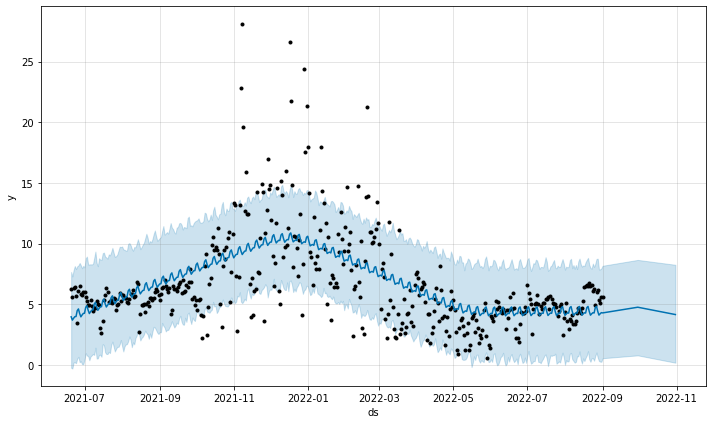

In [9]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

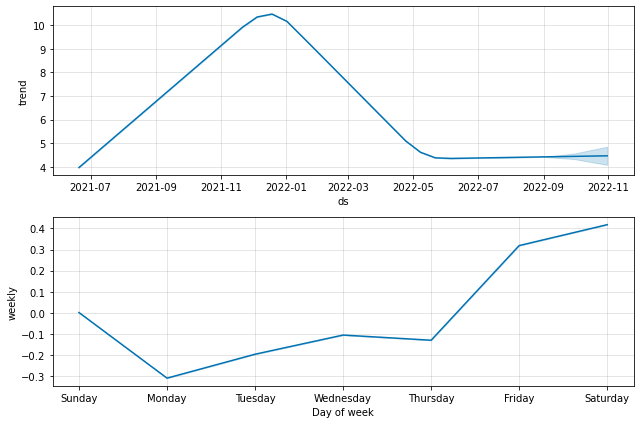

In [10]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [11]:
pm2 = data.drop('PM1(mcg/m³)', axis=1)
pm2 = pm2.drop('PM10(mcg/m³)', axis=1)

In [12]:
# python code to rename the columns
pm2.rename(columns={'Day':'ds','PM2.5(mcg/m³)':'y'},inplace=True)

In [13]:
pm2.head()

,ds,y
0,2021-06-20,21.02
1,2021-06-21,15.63
2,2021-06-22,11.60
3,2021-06-23,12.40
4,2021-06-24,11.68


In [14]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm2)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

14:10:57 - cmdstanpy - INFO - Chain [1] start processing
14:10:57 - cmdstanpy - INFO - Chain [1] done processing


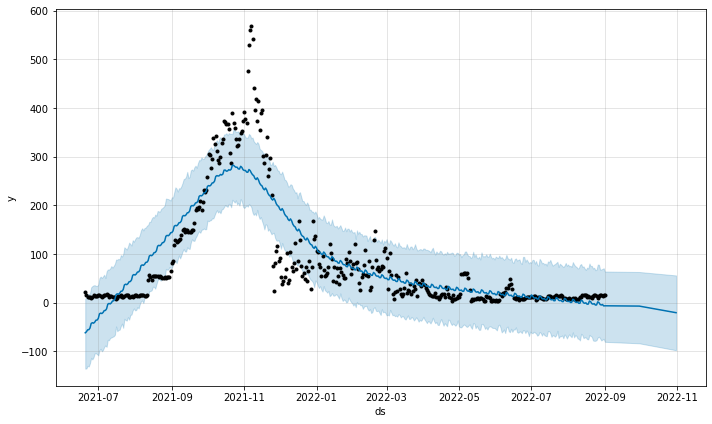

In [15]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

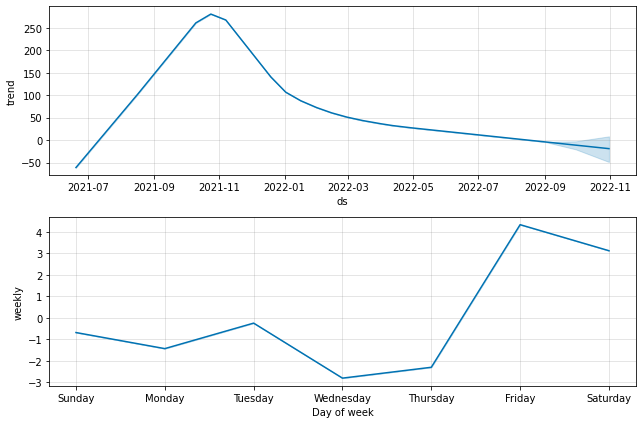

In [16]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [17]:
pm10 = data.drop('PM2.5(mcg/m³)', axis=1)
pm10 = pm10.drop('PM1(mcg/m³)', axis=1)

In [18]:
# python code to rename the columns
pm10.rename(columns={'Day':'ds','PM10(mcg/m³)':'y'},inplace=True)

In [19]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(pm10)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

14:10:59 - cmdstanpy - INFO - Chain [1] start processing
14:10:59 - cmdstanpy - INFO - Chain [1] done processing


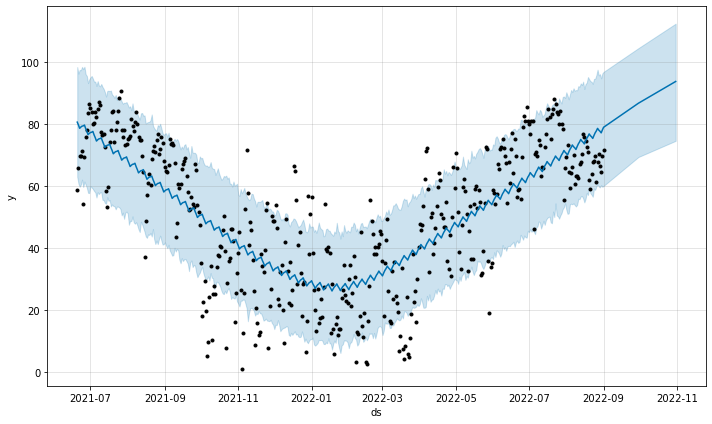

In [20]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

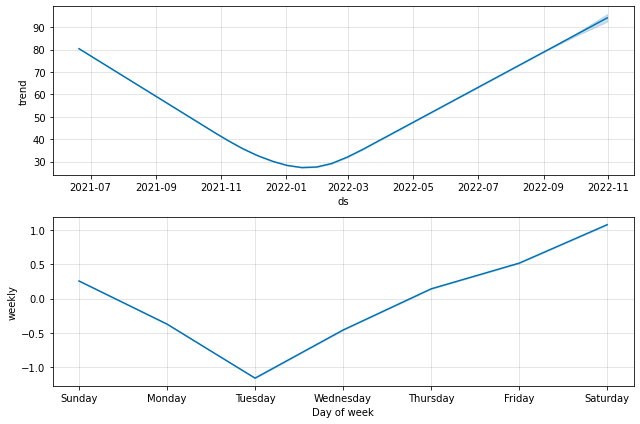

In [21]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [22]:
# importing dataset
dataset = pd.read_csv('../pm2_data.csv')

dataset.head()

,Unnamed: 0,Site,Parameter,Date (LT),Year,Month,Day,Hour,NowCast Conc.,AQI,AQI Category,Raw Conc.,Conc. Unit,Duration,QC Name
0,0,Bishkek,PM2.5 - Principal,2019-02-06 06:00:00,2019,2,6,6,-999.0,-999,NaN,12.0,UG/M3,1 Hr,Valid
1,1,Bishkek,PM2.5 - Principal,2019-02-06 07:00:00,2019,2,6,7,17.0,61,Moderate,20.0,UG/M3,1 Hr,Valid
2,2,Bishkek,PM2.5 - Principal,2019-02-06 08:00:00,2019,2,6,8,19.1,66,Moderate,21.0,UG/M3,1 Hr,Valid
3,3,Bishkek,PM2.5 - Principal,2019-02-06 09:00:00,2019,2,6,9,22.4,73,Moderate,25.0,UG/M3,1 Hr,Valid
4,4,Bishkek,PM2.5 - Principal,2019-02-06 10:00:00,2019,2,6,10,30.9,91,Moderate,39.0,UG/M3,1 Hr,Valid


In [23]:
dataset.drop('Unnamed: 0', axis=1, inplace=True)
dataset.drop('Site', axis=1, inplace=True)
dataset.drop('Parameter', axis=1, inplace=True)
dataset.drop('Year', axis=1, inplace=True)
dataset.drop('Month', axis=1, inplace=True)
dataset.drop('Day', axis=1, inplace=True)
dataset.drop('Hour', axis=1, inplace=True)
dataset.drop('NowCast Conc.', axis=1, inplace=True)
dataset.drop('AQI Category', axis=1, inplace=True)
dataset.drop('Raw Conc.', axis=1, inplace=True)
dataset.drop('Conc. Unit', axis=1, inplace=True)
dataset.drop('Duration', axis=1, inplace=True)
dataset.drop('QC Name', axis=1, inplace=True)


In [24]:

import numpy as np
dataset['AQI'].replace(-999, np.nan, inplace=True)

In [25]:
dataset.head()

,Date (LT),AQI
0,2019-02-06 06:00:00,NaN
1,2019-02-06 07:00:00,61.0
2,2019-02-06 08:00:00,66.0
3,2019-02-06 09:00:00,73.0
4,2019-02-06 10:00:00,91.0


In [26]:
dataset.isnull().sum()

Date (LT)      0
AQI          202
dtype: int64

In [27]:
dataset = dataset.bfill().ffill()

In [28]:
dataset.isnull().sum()

Date (LT)    0
AQI          0
dtype: int64

In [29]:
dataset["Date (LT)"] = pd.to_datetime(dataset["Date (LT)"])

In [30]:
# python code to rename the columns
dataset.rename(columns={'Date (LT)':'ds','AQI':'y'},inplace=True)

In [31]:

# initialiazing the model with 95% confidence interval
model = Prophet(interval_width= 0.80)

# train model
model.fit(dataset)

# forecasting for future
future = model.make_future_dataframe(periods=2, freq='M')
# forecast predictions
forecast = model.predict(future)

14:11:07 - cmdstanpy - INFO - Chain [1] start processing
14:12:02 - cmdstanpy - INFO - Chain [1] done processing


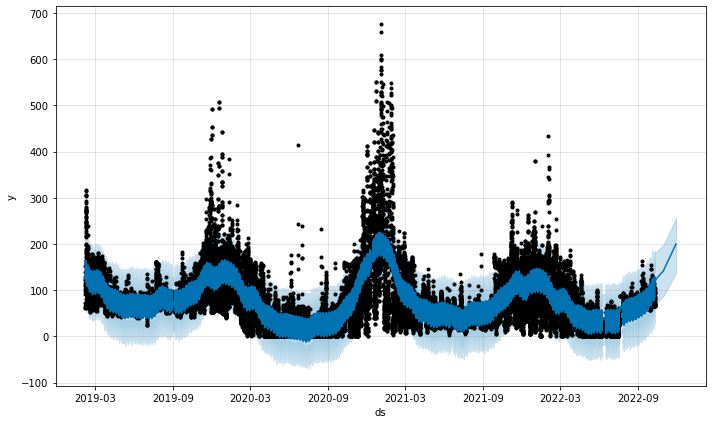

In [32]:
# visualizing the forecat predictions
fig1 = model.plot(forecast)

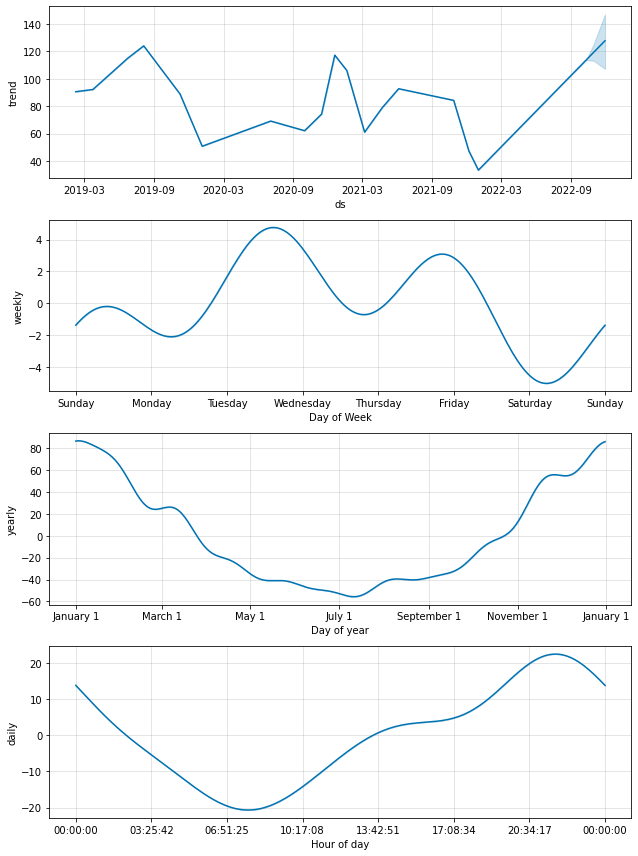

In [33]:
# weekly seasonality and yearly seasonality
fig2 = model.plot_components(forecast)

In [34]:
pm1.head()

,ds,y
0,2021-06-20,6.26
1,2021-06-21,5.61
2,2021-06-22,6.38
3,2021-06-23,6.43
4,2021-06-24,5.66


In [35]:
import pandas as pd
import numpy as np
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from scalecast.Forecaster import Forecaster

In [36]:
f = Forecaster(y=pm1['y'],
                   current_dates=pm1['ds'])

Let’s decompose this time series by viewing the PACF (Partial Auto Correlation Function) plot, which measures how much the y variable, in our case, pm1, is correlated to past values of itself and how far back a statistically significant correlation exists. The PACF plot is different from the ACF plot in that PACF controls for correlation between past terms.

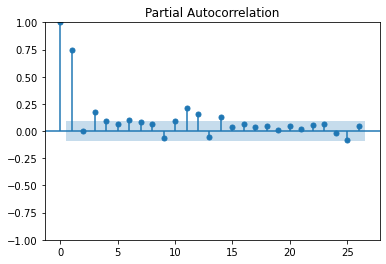

In [37]:
f.plot_pacf(lags=26)
plt.show()

Let’s further decompose the series into its trend, seasonal, and residual parts:

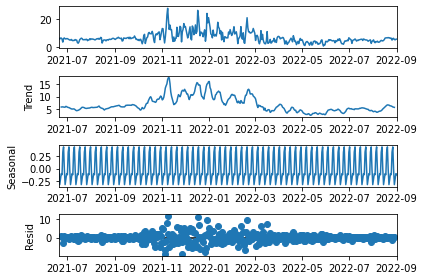

In [38]:
f.seasonal_decompose().plot()
plt.show()

In [39]:
stat, pval, _, _, _, _ = f.adf_test(full_res=True)

In [40]:
stat

-2.006476397638364

In [41]:
pval

0.2837406643355781

To model anything in scalecast, we need to complete the following three basic steps:

Specify a test length — all models are tested in scalecast with the same slice of data and at least one data point must be set aside to do so. There is no getting around this. The test length is a discrete number of the last observations in the full time series. You can pass a percentage or a discrete number to the set_test_length function.
Generate future dates —all models in scalecast produce a forecast in the same scale as the observed data. There is no getting around this. The number of dates you generate in this step will determine how long all models will be forecast out.
Choose an estimator — we will be using the “lstm” estimator, but there are a handful of others available.

In [45]:
f.set_test_length(12)       # 1. 12 observations to test the results
f.generate_future_dates(72) # 2. 12 future points to forecast
f.set_estimator('lstm')     # 3. LSTM neural network

Now, to call an LSTM forecast. By default, this model will be run with a single input layer of 8 size, Adam optimizer, tanh activation, a single lagged dependent-variable value to train with, a learning rate of 0.001, and no dropout. All data is scaled going into the model with a min-max scaler and un-scaled coming out. Anything you can pass to the fit() method in TensorFlow, you can also pass to the scalecast manual_forecast() method.

12/12 [==============================] - 0s 2ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

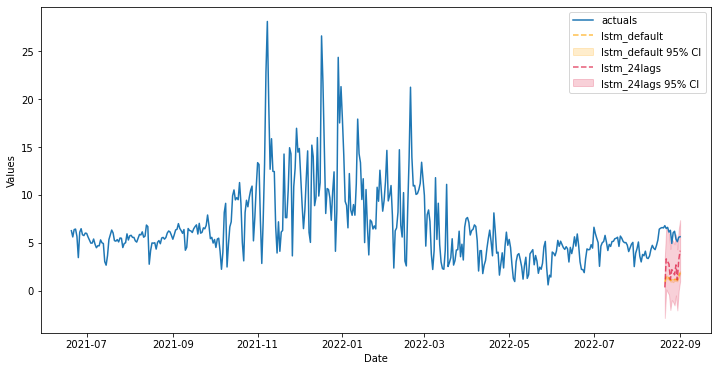

In [46]:
f.manual_forecast(call_me='lstm_default')
f.plot_test_set(ci=True)

Let’s start simple and just give it more lags to predict with. We saw a significant autocorrelation of 24 months in the PACF, so let’s use that

11/11 [==============================] - 0s 3ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

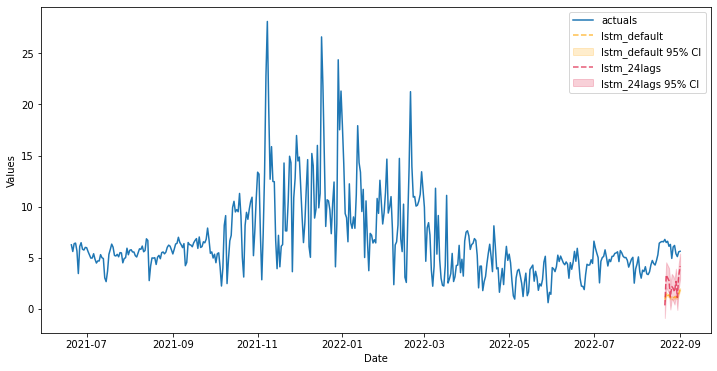

In [47]:
f.manual_forecast(call_me='lstm_24lags',lags=24)
f.plot_test_set(ci=True)

Already, we see some noticeable improvements, but this is still not even close to ready. An obvious next step might be to give it more time to train. In this universe, more time means more epochs. Let’s see where five epochs gets us. We also validate the model while it’s training by specifying validation_split=.2 below:

Epoch 1/5
10/10 [==============================] - 3s 61ms/step - loss: 0.1986 - val_loss: 0.1320
Epoch 2/5
10/10 [==============================] - 0s 13ms/step - loss: 0.1673 - val_loss: 0.0975
Epoch 3/5
10/10 [==============================] - 0s 13ms/step - loss: 0.1385 - val_loss: 0.0644
Epoch 4/5
10/10 [==============================] - 0s 15ms/step - loss: 0.1193 - val_loss: 0.0486
Epoch 5/5
1/1 [==============================] - 0s 341ms/step
Epoch 1/5
9/9 [==============================] - 2s 59ms/step - loss: 0.2316 - val_loss: 0.2114
Epoch 2/5
9/9 [==============================] - 0s 13ms/step - loss: 0.2161 - val_loss: 0.1946
Epoch 3/5
9/9 [==============================] - 0s 15ms/step - loss: 0.1990 - val_loss: 0.1735
Epoch 4/5
9/9 [==============================] - 0s 15ms/step - loss: 0.1810 - val_loss: 0.1508
Epoch 5/5
11/11 [==============================] - 0s 3ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

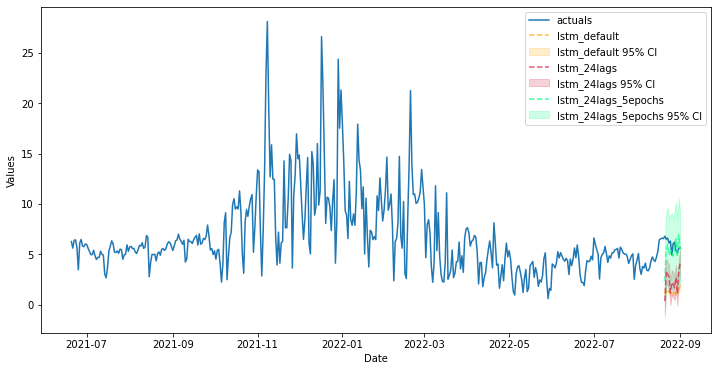

In [48]:
f.manual_forecast(call_me='lstm_24lags_5epochs',
                  lags=24,
                  epochs=5,
                  validation_split=.2,
                  shuffle=True)
f.plot_test_set(ci=True)

Again, closer. A couple values even fall within the 95% confidence interval this time. Next, let’s try increasing the number of layers in the network to 3, increasing epochs to 25, but monitoring the validation loss value and telling the model to quit after more than 5 iterations in which that doesn’t improve. This is known as early stopping.

Epoch 1/25
10/10 [==============================] - 7s 141ms/step - loss: 0.2088 - val_loss: 0.1204
Epoch 2/25
10/10 [==============================] - 0s 30ms/step - loss: 0.1625 - val_loss: 0.0821
Epoch 3/25
10/10 [==============================] - 0s 32ms/step - loss: 0.1295 - val_loss: 0.0511
Epoch 4/25
10/10 [==============================] - 0s 32ms/step - loss: 0.1095 - val_loss: 0.0367
Epoch 5/25
10/10 [==============================] - 0s 33ms/step - loss: 0.0989 - val_loss: 0.0276
Epoch 6/25
10/10 [==============================] - 0s 32ms/step - loss: 0.0954 - val_loss: 0.0321
Epoch 7/25
10/10 [==============================] - 0s 33ms/step - loss: 0.0947 - val_loss: 0.0270
Epoch 8/25
10/10 [==============================] - 0s 34ms/step - loss: 0.0941 - val_loss: 0.0265
Epoch 9/25
10/10 [==============================] - 0s 29ms/step - loss: 0.0938 - val_loss: 0.0309
Epoch 10/25
10/10 [==============================] - 0s 37ms/step - loss: 0.0937 - val_loss: 0.0278
Epoch 11

<AxesSubplot:xlabel='Date', ylabel='Values'>

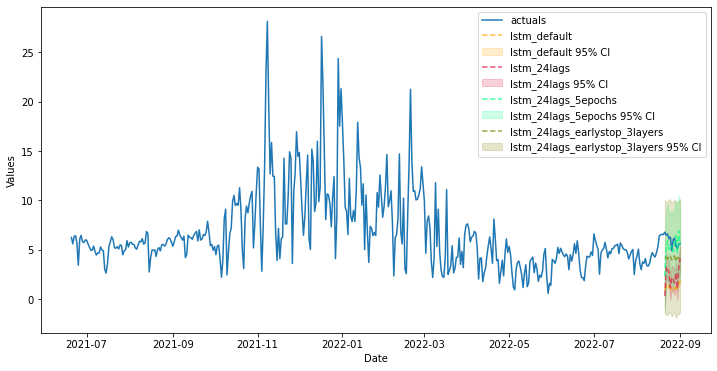

In [49]:
from tensorflow.keras.callbacks import EarlyStopping
f.manual_forecast(call_me='lstm_24lags_earlystop_3layers',
                  lags=24,
                  epochs=25,
                  validation_split=.2,
                  shuffle=True,
                  callbacks=EarlyStopping(monitor='val_loss',
                                          patience=5),
                  lstm_layer_sizes=(16,16,16),
                  dropout=(0,0,0))
f.plot_test_set(ci=True)

Epoch 1/15
10/10 [==============================] - 8s 230ms/step - loss: 0.1565 - val_loss: 0.0479
Epoch 2/15
10/10 [==============================] - 1s 69ms/step - loss: 0.1031 - val_loss: 0.0393
Epoch 3/15
10/10 [==============================] - 1s 81ms/step - loss: 0.0972 - val_loss: 0.0423
Epoch 4/15
10/10 [==============================] - 1s 80ms/step - loss: 0.0971 - val_loss: 0.0353
Epoch 5/15
10/10 [==============================] - 1s 80ms/step - loss: 0.0952 - val_loss: 0.0360
Epoch 6/15
10/10 [==============================] - 1s 68ms/step - loss: 0.0950 - val_loss: 0.0385
Epoch 7/15
10/10 [==============================] - 1s 69ms/step - loss: 0.0963 - val_loss: 0.0418
Epoch 8/15
10/10 [==============================] - 1s 69ms/step - loss: 0.0982 - val_loss: 0.0414
Epoch 9/15
10/10 [==============================] - 1s 69ms/step - loss: 0.0957 - val_loss: 0.0518
Epoch 10/15
10/10 [==============================] - 1s 68ms/step - loss: 0.0951 - val_loss: 0.0394
Epoch 11

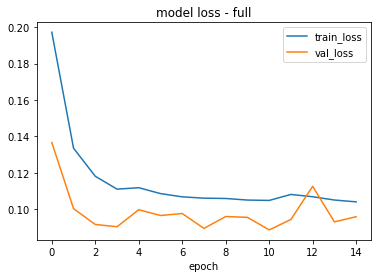

11/11 [==============================] - 0s 19ms/step


<AxesSubplot:xlabel='Date', ylabel='Values'>

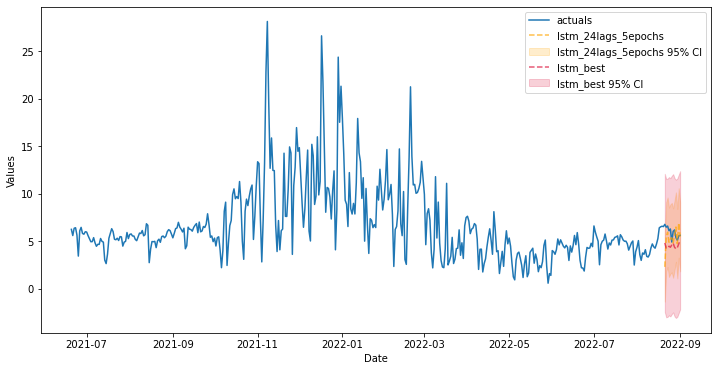

In [50]:
f.manual_forecast(call_me='lstm_best',
                  lags=36,
                  batch_size=32,
                  epochs=15,
                  validation_split=.2,
                  shuffle=True,
                  activation='tanh',
                  optimizer='Adam',
                  learning_rate=0.001,
                  lstm_layer_sizes=(72,)*4,
                  dropout=(0,)*4,
                  plot_loss=True)
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2',ci=True)

Now that we finally found an acceptable LSTM model, let’s benchmark it against a simple model, the simplest model, Multiple Linear Regression (MLR), to see just how much time we wasted.

To switch from an LSTM to an MLR model in scalecast, we need to follow these steps:

Choose the MLR estimator — just like how we previously chose the LSTM estimator.
Add regressors to the model —in LSTM, we only used the series’ own history and let the model parameterize itself. With MLR, we can still use the series’ own history, but we can also add information about which month, quarter, or year any given observation falls into to capture seasonality and a time trend (among other options). We could even ingest a dataframe of our own regressors (not shown here).
Difference non-stationary data — this is how we mitigate the results of the Augmented Dickey-Fuller test showing we had non-stationary data. We could have done this with LSTM as well, but we were hoping it was sophisticated enough to work without this step.
This is all accomplished in the code below:

In [51]:
f.set_estimator('mlr') # 1. choose the mlr estimator
f.add_ar_terms(24) # 2. add regressors (24 lagged terms)
f.add_seasonal_regressors('month','quarter',dummy=True) # 2.
f.add_seasonal_regressors('year') # 2.
f.add_time_trend() # 2.
f.diff() # 3. difference non-stationary data

<AxesSubplot:xlabel='Date', ylabel='Values'>

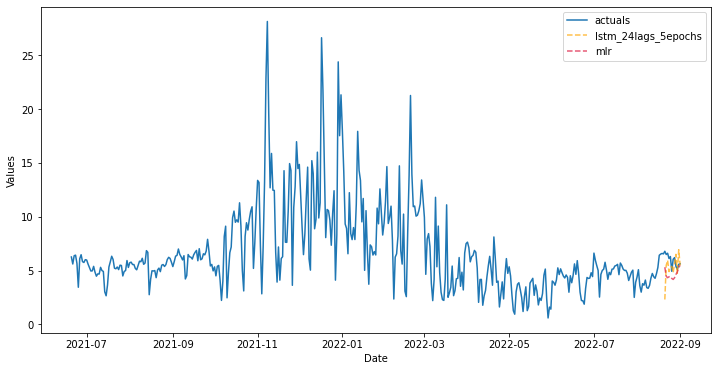

In [52]:
f.manual_forecast()
f.plot_test_set(order_by='LevelTestSetMAPE',models='top_2')

<AxesSubplot:xlabel='Date', ylabel='Values'>

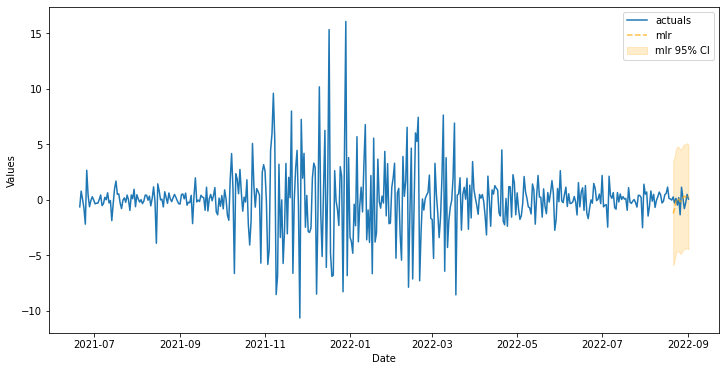

In [53]:
f.plot_test_set(models='mlr',ci=True)

We can then see our models’ predictions on future data:

<AxesSubplot:xlabel='Date', ylabel='Values'>

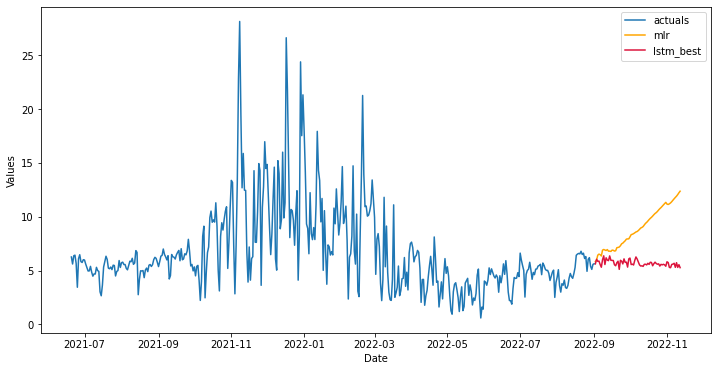

In [54]:
f.plot(models=['mlr','lstm_best'],
       order_by='LevelTestSetMAPE',
       level=True)